# Convert and view Lignum XML files

In [1]:
%pylab inline
%gui qt
from vpltkdisplay import PlantGL

Populating the interactive namespace from numpy and matplotlib
PyQt4 used: your application or derivative works must be released under GPL or CeCILL license !


In [2]:
import lignum
from lignum.io import xml2mtg, mtg2xml, lignum_turtle
from openalea.mtg import *
from openalea.plantgl.all import Viewer, Scene

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The matplotlib.mpl module was deprecated in version 1.3. Use `import matplotlib as mpl` instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [6]:
from openalea.deploy import shared_data
file_names = shared_data.shared_data(lignum,share_path="../../share/stump", pattern='Growth*.xml')
print file_names

[path(u'/Users/pradal/devlp/git/lignum/share/stump/GrowthStep--Split--Stump-5-62---out-62.xml')]


## Reading xml file

In [7]:
gs = []
scenes = []
for fn in file_names:
    g = xml2mtg(fn)
    gs.append(g)
    scenes.append(lignum_turtle(g))

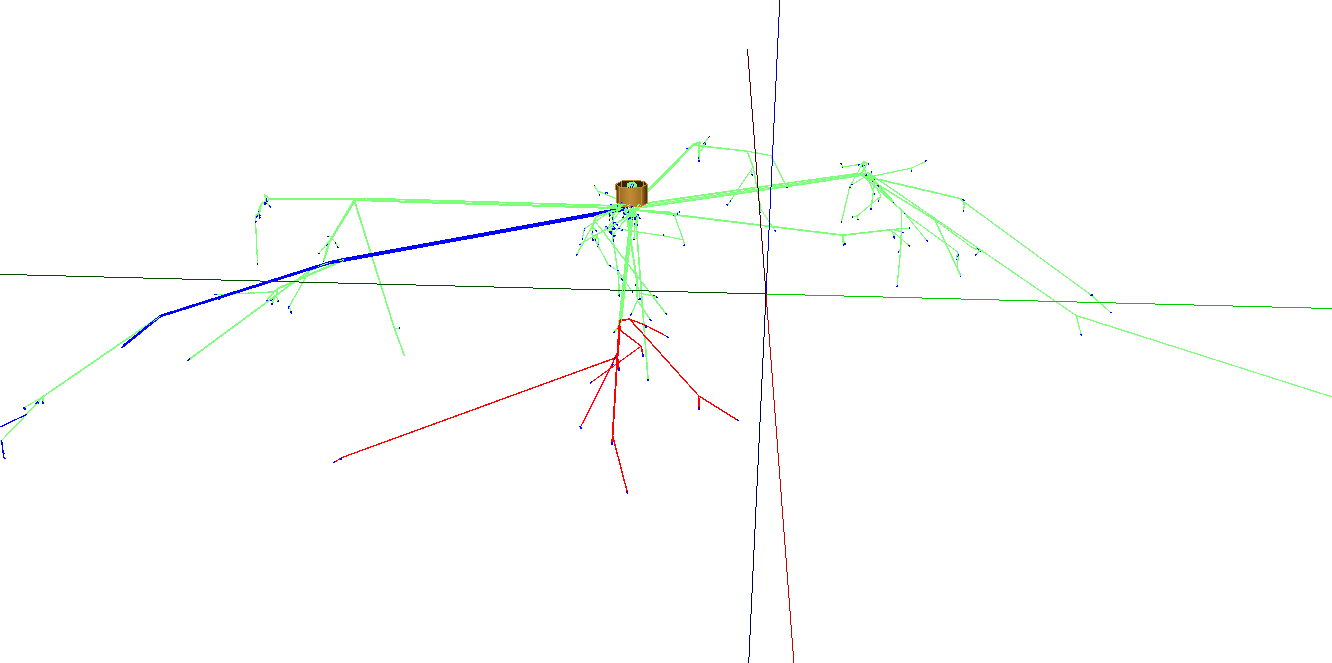

In [9]:
PlantGL(scenes[0])

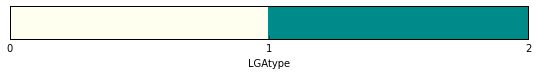

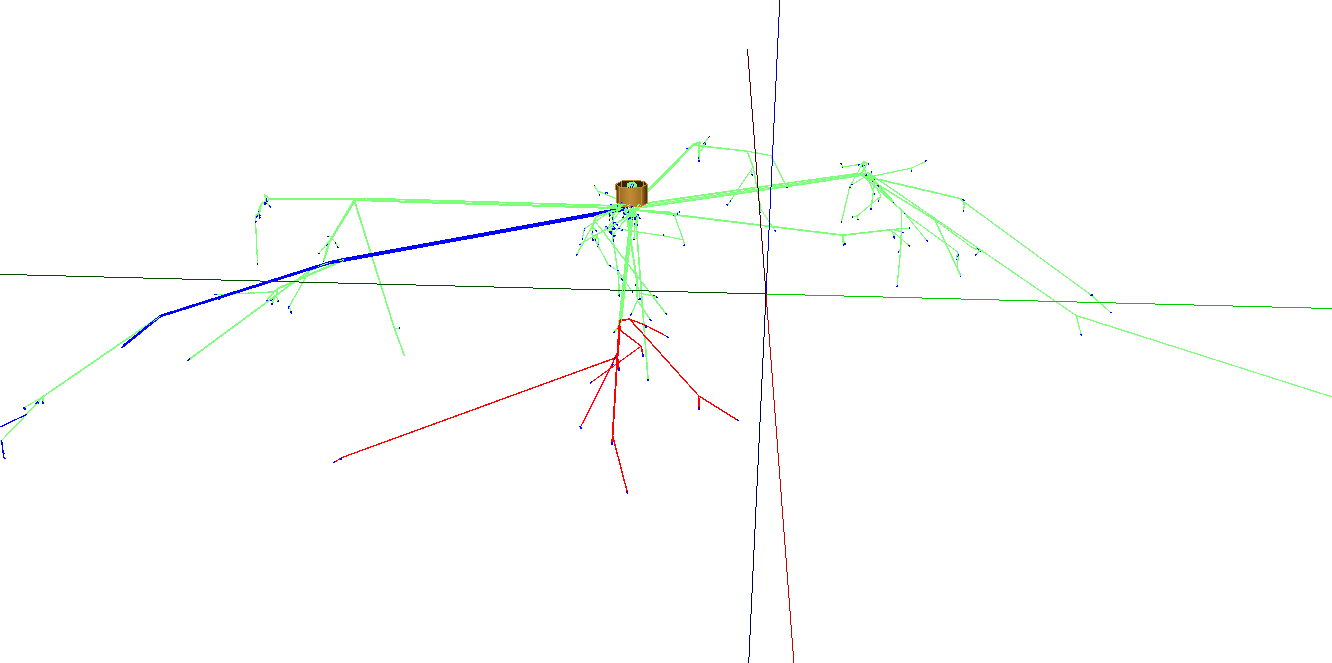

In [10]:
from openalea.mtg.plantframe import color

g = xml2mtg(file_names[0])

def compute_color(g, cmap='jet', lognorm=False):
    
    if not 'LGAtype' in g.properties():
        return
    p = g.property('LGAtype')
    keys = p.keys()
    vs = p.values()


    if vs and isinstance(vs[0], str):
        try:
            values = np.array(vs,dtype='int')
        except ValueError:
            values = np.array(vs,dtype='float')
        g.properties()['LGAtype'] = dict(zip(keys, values))

    color.colormap(g, 'LGAtype', cmap=cmap, lognorm=lognorm)
    return g


g = compute_color(g,cmap='jet',lognorm=False)
#color.colorbar(g,'LGAtype',cmap='jet', lognorm=False)
color.colorbar_lut(g,'LGAtype')

scene = lignum_turtle(g)
PlantGL(scene)

In [12]:
set(g.property('LGAtype').values())

{0, 1, 2}

In [13]:
lut = {}
lut[0] = (255, 110,50)
lut[1] = (0,255,0)
lut[2] = (0,0,255)
for g in gs:
    ct = g.property('LGAtype')
    _colors = dict((v, lut.get(x,(0,127,127))) for v, x in ct.iteritems())
    g.properties()['color'] = _colors

In [18]:
scenes = map(lambda g: lignum_turtle(g, has_color=True), (gs[0],))



In [15]:
scene = reduce(lambda x, y: x.merge(y), scenes, Scene())

In [16]:
scene = Scene()
for s in scenes:
    scene.merge(s)

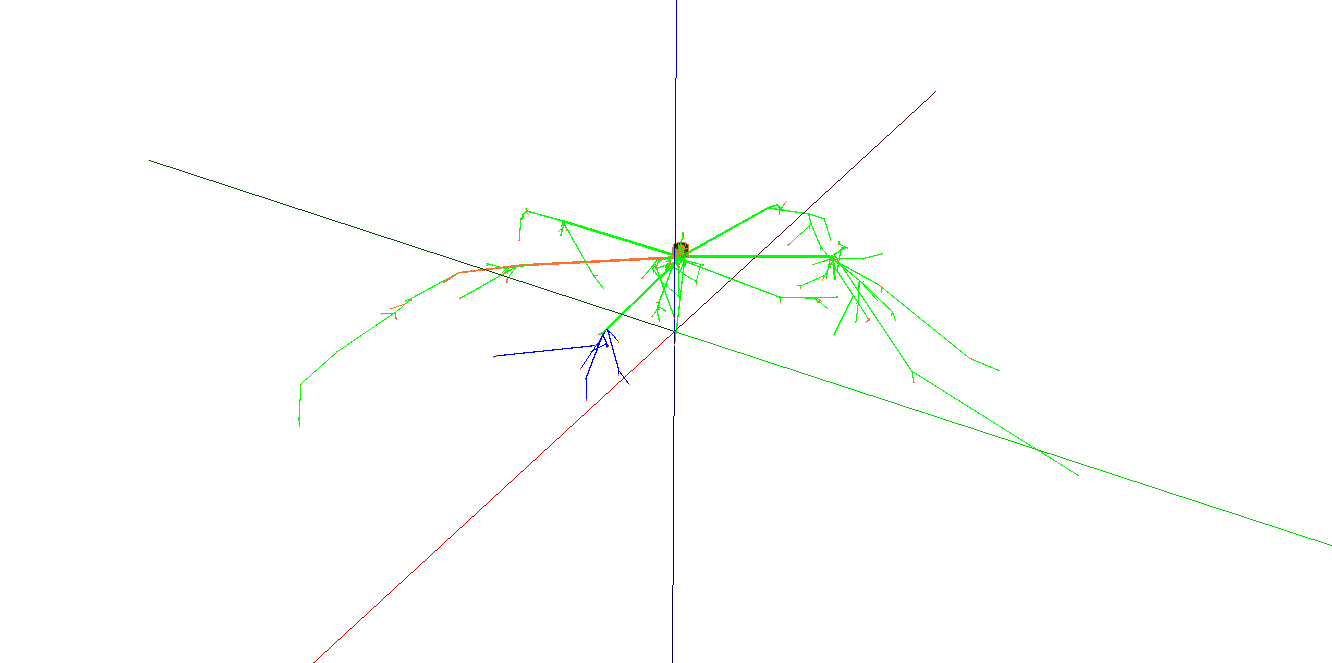

In [19]:
PlantGL(scenes[0])